<center>
    <h1>Final HPC Project</h1>
    <br/>
    Students : <b>Pierjos Francis COLERE MBOUKOU</b> & <b>Youssef HOURRI</b>
    <br/>
    Supervisors : <b>Imad KISSAMI</b> & <b>Nouredine OUHADDOU</b>
</center>

## 1. Solving Poisson equation using Finite Difference and Jacobi's iterative solver

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['animation.html'] = 'html5'
from matplotlib import cm
from matplotlib import animation
import time

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [55]:
# Size of discretization
Nx = 10
Ny = 10


# Grid spacing '''
hx = 1./Nx
hy = 1./Ny

# Equation Coefficients '''
coef = np.zeros(3)
coef[0] = (0.5*hx*hx*hy*hy)/(hx*hx+hy*hy)
coef[1] = 1./(hx*hx)
coef[2] = 1./(hy*hy)

SIZE = Nx * Ny

f = np.zeros((Nx, Ny))
u_exact = np.zeros((Nx, Ny))

for i in range(1, Nx-1):
    x = hx*i
    for j in range(1, Ny-1):
        y = hy*j
        u_exact[i,j] = x*y*(x-1)*(y-1)
        f[i,j] = 2*(x*x - x + y*y -y)
        
u       = np.zeros((Nx, Ny))
u_new   = np.zeros((Nx, Ny))

In [56]:
# Valeurs exactes de u(x, y)
print(u_exact)

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0081 0.0144 0.0189 0.0216 0.0225 0.0216 0.0189 0.0144 0.    ]
 [0.     0.0144 0.0256 0.0336 0.0384 0.04   0.0384 0.0336 0.0256 0.    ]
 [0.     0.0189 0.0336 0.0441 0.0504 0.0525 0.0504 0.0441 0.0336 0.    ]
 [0.     0.0216 0.0384 0.0504 0.0576 0.06   0.0576 0.0504 0.0384 0.    ]
 [0.     0.0225 0.04   0.0525 0.06   0.0625 0.06   0.0525 0.04   0.    ]
 [0.     0.0216 0.0384 0.0504 0.0576 0.06   0.0576 0.0504 0.0384 0.    ]
 [0.     0.0189 0.0336 0.0441 0.0504 0.0525 0.0504 0.0441 0.0336 0.    ]
 [0.     0.0144 0.0256 0.0336 0.0384 0.04   0.0384 0.0336 0.0256 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]]


In [57]:
# Valeurs exactes de f(x, y)
print(f)

[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.36 -0.5  -0.6  -0.66 -0.68 -0.66 -0.6  -0.5   0.  ]
 [ 0.   -0.5  -0.64 -0.74 -0.8  -0.82 -0.8  -0.74 -0.64  0.  ]
 [ 0.   -0.6  -0.74 -0.84 -0.9  -0.92 -0.9  -0.84 -0.74  0.  ]
 [ 0.   -0.66 -0.8  -0.9  -0.96 -0.98 -0.96 -0.9  -0.8   0.  ]
 [ 0.   -0.68 -0.82 -0.92 -0.98 -1.   -0.98 -0.92 -0.82  0.  ]
 [ 0.   -0.66 -0.8  -0.9  -0.96 -0.98 -0.96 -0.9  -0.8   0.  ]
 [ 0.   -0.6  -0.74 -0.84 -0.9  -0.92 -0.9  -0.84 -0.74  0.  ]
 [ 0.   -0.5  -0.64 -0.74 -0.8  -0.82 -0.8  -0.74 -0.64  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [59]:
def plot_result(f, title):
    nb_x, nb_y = f.shape
     
    x = np.linspace(0, 2, nb_x)
    y = np.linspace(0, 2, nb_y)
    
    fig = plt.figure(figsize=(7, 5), dpi=100)
    ax = fig.gca(projection='3d')                      
    X, Y = np.meshgrid(x, y)      

    ax.plot_surface(X, Y, f, cmap=cm.viridis)
    plt.title(title)
    plt.show()

### Building jacobi function to solve Poisson equation

In [60]:
def jacobi(Nx=10, Ny=10, max_iter=100000, tolerance=1e-10):
    
    # Let's build the progress bar
    pbar = tqdm(total=max_iter)
    pbar.set_description("it / max_it")

    
    hx = 1./Nx
    hy = 1./Ny

    # Equation Coefficients '''
    coef = np.zeros(3)
    coef[0] = (0.5*hx*hx*hy*hy)/(hx*hx+hy*hy)
    coef[1] = 1./(hx*hx)
    coef[2] = 1./(hy*hy)

    SIZE = Nx * Ny

    f = np.zeros((Nx, Ny))
    u_exact = np.zeros((Nx, Ny))

    for i in range(1, Nx-1):
        x = hx*i
        for j in range(1, Ny-1):
            y = hy*j
            u_exact[i,j] = x*y*(x-1)*(y-1)
            f[i,j] = 2*(x*x - x + y*y -y)

    u       = np.zeros((Nx, Ny))
    u_new   = np.zeros((Nx, Ny))


    it = 0 # iteration counter
    diff = 1.0
    tol_hist_jac = []
    
    t1 = time.time()
    while (diff > tolerance):
        if it > max_iter:
            print('\nSolution did not converged within the maximum'
                  ' number of iterations'
                  f'\nLast l2_diff was: {diff:.5e}')
            break
        
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                u_new[i,j] = coef[0]*(coef[1]*(u[i+1,j]+u[i-1,j])+coef[2]*(u[i,j+1]+u[i,j-1]) - f[i,j])
        
        
        diff = np.linalg.norm(u-u_new)
        tol_hist_jac.append(diff)
        
        it += 1
        u = u_new.copy()
        # Updating the progress bar
        pbar.update(1)
    
    t2 = time.time()
    print(f'\nConvergence after {it} iterations in {t2 - t1} secs')
    del(pbar)
    return u_new

In [61]:
# Computing jacobi
Nx = 10
Ny = 10
u_jacobi = jacobi(Nx=Nx, Ny=Ny)

  0%|          | 0/100000 [00:00<?, ?it/s]


Convergence after 304 iterations in 0.05444669723510742 secs


In [62]:
def poisson_jacobi_for_coupling(u, f, coef, Nx=10, Ny=10):
    
    u_new = u.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_new[i,j] = coef[0]*(coef[1]*(u[i+1,j]+u[i-1,j])+coef[2]*(u[i,j+1]+u[i,j-1]) - f[i,j])
    return u_new

In [63]:
res = poisson_jacobi_for_coupling(u, f, coef)
print(res)

[[0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.     ]
 [0.      0.0009  0.00125 0.0015  0.00165 0.0017  0.00165 0.0015  0.00125
  0.     ]
 [0.      0.00125 0.0016  0.00185 0.002   0.00205 0.002   0.00185 0.0016
  0.     ]
 [0.      0.0015  0.00185 0.0021  0.00225 0.0023  0.00225 0.0021  0.00185
  0.     ]
 [0.      0.00165 0.002   0.00225 0.0024  0.00245 0.0024  0.00225 0.002
  0.     ]
 [0.      0.0017  0.00205 0.0023  0.00245 0.0025  0.00245 0.0023  0.00205
  0.     ]
 [0.      0.00165 0.002   0.00225 0.0024  0.00245 0.0024  0.00225 0.002
  0.     ]
 [0.      0.0015  0.00185 0.0021  0.00225 0.0023  0.00225 0.0021  0.00185
  0.     ]
 [0.      0.00125 0.0016  0.00185 0.002   0.00205 0.002   0.00185 0.0016
  0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.     ]]


### Plotting jaboci's values and the exact values

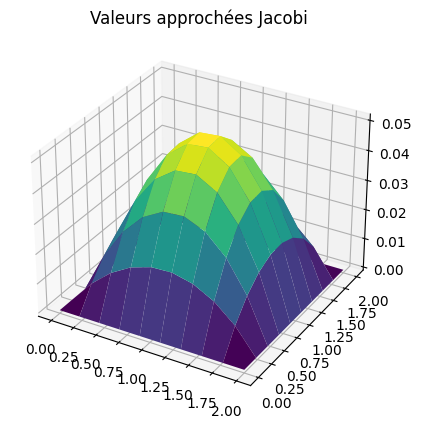

In [64]:
# Valuers approchées par Jacobi
plot_result(u_jacobi, 'Valeurs approchées Jacobi')

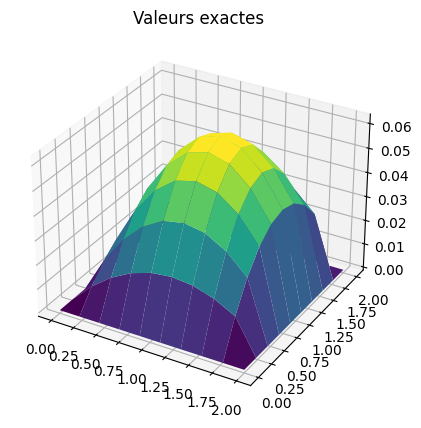

In [65]:
# Valuers exactes
plot_result(u_exact, 'Valeurs exactes')

## 2. Advection Diffusion equation using Finite Difference

In [66]:
def advection_diffusion(b, rho, dt, u, v, dx, dy):
            
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

## 3. Coupling Jacobi's iterative solver and advection diffusion

In [68]:
def navier_stokes(nt, u, v, f, dt, nx, ny, dx, dy, p, rho, nu):
    
    tolerance = 1e-10
    # Let's build the progress bar
    pbar = tqdm(total=nt)
    pbar.set_description("it/nt")
    
    
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    pn = np.empty_like(p)
    
    # Equation Coefficients '''
    coef = np.zeros(3)
    coef[0] = (0.5*dx*dx*dy*dy)/(dx*dx+dy*dy)
    coef[1] = 1./(dx*dx)
    coef[2] = 1./(dy*dy)
    
    solutions = [p]
    
    #fill the update of u and v
    it = 0
    diff_p = 1.
    t1 = time.time()
    while (diff_p > tolerance):
        it += 1
        if it > nt:
            print('\nSolution did not converged within the maximum number of iterations')
            break
        
        un = u.copy()
        vn = v.copy()
        pn = p.copy()

        b = advection_diffusion(b, rho, dt, u, v, dx, dy)
        p = poisson_jacobi_for_coupling(pn, f, coef, nx, ny)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                     un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                   (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                   (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                   (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                   (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # (velocity on cavity lid equal to 1)
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        solutions += [p]
        
        diff_p = np.linalg.norm(p-pn)
        
        
        pbar.update(1)
    
    t2 = time.time()
    print(f'\nConvergence after {it} iterations in {t2 - t1} secs')
    del pbar
    return u, v, p, solutions

  0%|          | 0/10000 [00:00<?, ?it/s]


Convergence after 330 iterations in 0.09692835807800293 secs


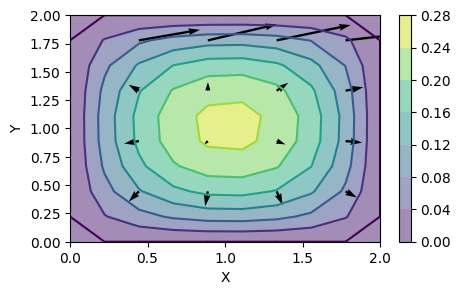

In [69]:
nx = 10
ny = 10
nt = 10000

# Let's calcule f(x, y)
f = np.zeros((nx, ny))
u_exact = np.zeros((nx, ny))

for i in range(1, nx-1):
    x = hx*i
    for j in range(1, ny-1):
        y = hy*j
        u_exact[i,j] = x*y*(x-1)*(y-1)
        f[i,j] = 2*(x*x - x + y*y -y)
        

c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

u, v, p, solutions = navier_stokes(nt, u, v, f, dt, nx, ny, dx, dy, p, rho, nu)

fig = plt.figure(figsize=(5, 3), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Let's augment size of discretization

  0%|          | 0/10000 [00:00<?, ?it/s]


Convergence after 6974 iterations in 18.11213707923889 secs


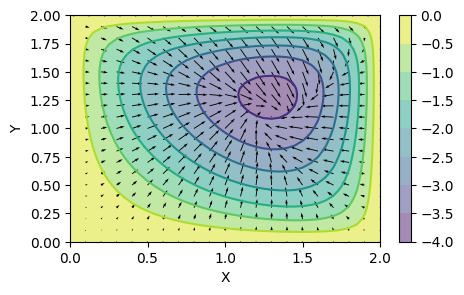

In [72]:
nx = 41 # augmentation here
ny = 41 # augmentation here
nt = 10000

# Let's calcule f(x, y)
f = np.zeros((nx, ny))
u_exact = np.zeros((nx, ny))

for i in range(1, nx-1):
    x = hx*i
    for j in range(1, ny-1):
        y = hy*j
        u_exact[i,j] = x*y*(x-1)*(y-1)
        f[i,j] = 2*(x*x - x + y*y -y)
        

c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

u, v, p, solutions = navier_stokes(nt, u, v, f, dt, nx, ny, dx, dy, p, rho, nu)

fig = plt.figure(figsize=(5, 3), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Let's create animation plot to see diffusion (if you don't want to run the code below the result is in file diffusion_animation.mp4)**

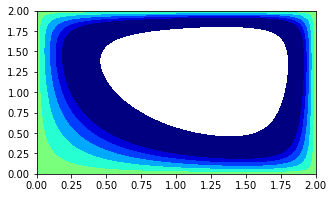

In [75]:
fig = plt.figure(figsize=(5,3))
ims = []
levs = np.linspace(-2,2,20)
i = 0
for solution in solutions :
    if(i%10==0):
        im = plt.contourf(X, Y, solution, cmap=cm.jet,levels=levs,vmax=1.0,vmin=-1.0)
        ims.append(im.collections)
    i += 1

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani

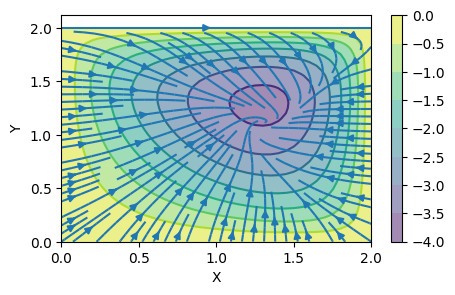

In [74]:
fig = plt.figure(figsize=(5, 3), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.streamplot(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y');

## 4. Poisson Equation using MPI with grid method

Execution poisson with 1  MPI processes
Size of the domain : ntx= 10  nty= 10 
Dimension for the topology : 1  along x 1  along y
-----------------------------------------
Process 0  neighbour: N -2  E -2  S  -2  W -2
Rank in the topology : 0  Local Grid Index : 1.0  to  10.0  along x,  1.0  to 10.0  along y


  0%|          | 0/100000 [00:00<?, ?it/s]


Convergence after 1466 iterations in 0.4335215559999597 secs
Exact Solution u_exact - Computed Solution u - difference
0.006830134553650707 - 0.006830134553650334 3.7296554733501353e-16
0.012294242196571272 - 0.012294242196570557 7.147060721024445e-16
0.016392322928761693 - 0.01639232292876069 1.0026701691145945e-15
0.01912437675022198 - 0.01912437675022077 1.2108369862318114e-15
0.02049040366095212 - 0.020490403660950802 1.3183898417423734e-15
0.02049040366095212 - 0.020490403660950802 1.3183898417423734e-15
0.01912437675022198 - 0.01912437675022077 1.2108369862318114e-15
0.016392322928761697 - 0.01639232292876069 1.0061396160665481e-15
0.012294242196571268 - 0.012294242196570557 7.112366251504909e-16
0.0068301345536507015 - 0.006830134553650333 3.686287386450715e-16


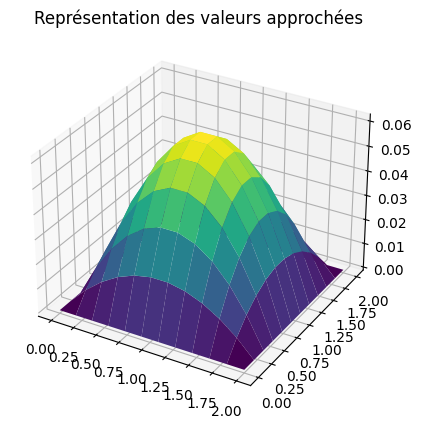

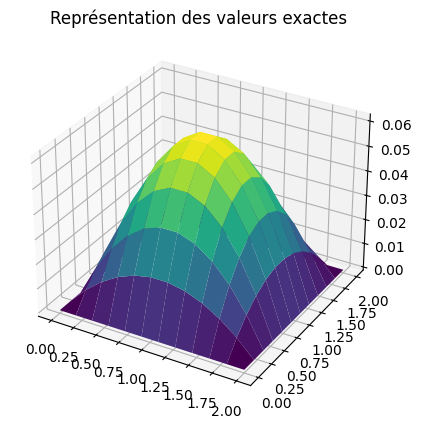

In [48]:
import numpy as np
from mpi4py import MPI
from psydac.ddm.partition import compute_dims

import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from numba import njit

comm = MPI.COMM_WORLD
nb_procs = comm.Get_size()
rank = comm.Get_rank()

nb_neighbours = 4
N = 0
E = 1
S = 2
W = 3

neighbour = np.zeros(nb_neighbours, dtype=np.int8)
ntx = 10
nty = 10

Nx = ntx+2
Ny = nty+2

npoints  =  [ntx, nty]
p1 = [2,2]
P1 = [False, False]
reorder = True

''' Grid spacing '''
hx = 1/(ntx+1.)
hy = 1/(nty+1.)

''' Equation Coefficients '''
coef = np.zeros(3)
coef[0] = (0.5*hx*hx*hy*hy)/(hx*hx+hy*hy)
coef[1] = 1./(hx*hx)
coef[2] = 1./(hy*hy)

def create_2d_cart(npoints, p1, P1, reorder):
    
    # Store input arguments                                                                                                                                                                                                                                               
    npts    = tuple(npoints)
    pads    = tuple(p1)
    periods = tuple(P1)
    reorder = reorder
    
    nprocs, block_shape = compute_dims(nb_procs, npts, pads )
    
    dims = nprocs
    
    if (rank == 0):
        print("Execution poisson with",nb_procs," MPI processes\n"
               "Size of the domain : ntx=",npoints[0], " nty=",npoints[1],"\n"
               "Dimension for the topology :",dims[0]," along x", dims[1]," along y\n"
               "-----------------------------------------")  
    
    '''
    * Creation of the Cartesian topology
    '''
    
    cart2d = comm.Create_cart(dims = dims ,periods = periods ,reorder = reorder)
    
    return dims, cart2d

def create_2dCoords(cart2d, npoints, dims):
   
    ''' Create 2d coordinates of each process '''
    
    ''' 1. Get coordinates from cart '''
    coords = cart2d.Get_coords(rank)
    
    z = [npoints[0]/dims[0],npoints[1]/dims[1]]
    
    ''' 2. Calculate sx, ex, sy and ey '''
    sx = coords[0]*z[0]+1
    ex = coords[0]*z[0]+z[0]
    
    sy = coords[1]*z[1]+1
    ey = coords[1]*z[1]+z[1]

    print("Rank in the topology :",rank," Local Grid Index :", sx, " to ",ex," along x, ",sy, " to", ey," along y")
    
    return int(sx), int(ex), int(sy), int(ey)

def create_neighbours(cart2d):

    # Get my northern and southern neighbours
    neighbour[S] , neighbour[N] = cart2d.Shift( direction = 1 , disp=1 )
    
    # Get my western and eastern neighbours
    neighbour[W] , neighbour[E] = cart2d.Shift( direction = 0 , disp=1 )

    
    print("Process", rank," neighbour: N", neighbour[N]," E",neighbour[E] ," S ",neighbour[S]," W",neighbour[W])
    
    return neighbour


'''Creation of the derived datatypes needed to exchange points with neighbours'''
def create_derived_type(sx, ex, sy, ey):
    
    '''Creation of the type_line derived datatype to exchange points with northern to southern neighbours '''


    '''Creation of the type_column derived datatype to exchange points with western to eastern neighbours '''

    '''
    We tried to create derived type but did get wanted values even for exact values of u.
    So we found that it's better to use slice instead of derived types.
    ''' 

    type_ligne = 0
    type_column = 0
    return type_ligne, type_column


''' Exchange the points at the interface '''
def communications(u, sx, ex, sy, ey, type_column, type_ligne):
    
    """ Here IDX(i, j) means index of element located at i, j in the array u """
    
    ''' Send to neighbour N and receive from neighbour S '''
    if(neighbour[N]>=0):

        sendbuf = u[IDX(sx-1,ey):IDX(ex+1,ey)+1:ey-sy+3].copy()
        comm.Send( sendbuf ,neighbour[N])
        
        recvbuf = np.zeros(ex-sx+3)
        comm.Recv( recvbuf ,neighbour[N])
        u[IDX(sx-1,sy-1):IDX(ex+1,sy-1)+1:ey-sy+3] = recvbuf
    
    
    ''' Send to neighbour S and receive from neighbour N '''
    if(neighbour[S]>=0):

        sendbuf = u[IDX(sx-1,sy):IDX(ex+1,sy)+1:ey-sy+3].copy()
        comm.Send( sendbuf ,neighbour[S])

        recvbuf = np.zeros(ex-sx+3)
        comm.Recv(recvbuf ,neighbour[S])
        u[IDX(sx-1,ey+1):IDX(ex+1,ey+1)+1:ey-sy+3] = recvbuf

        
    ''' Send to neighbour W and receive from neighbour E '''
    if(neighbour[W]>=0):

        sendbuf = u[IDX(sx,sy-1):IDX(sx,ey+1)+1].copy()
        comm.Send( sendbuf, neighbour[W])

        recvbuf = np.zeros(ey-sy+3)
        comm.Recv(recvbuf ,neighbour[W])
        u[IDX(sx-1,sy-1):IDX(sx-1,ey+1)+1] = recvbuf
    
    ''' Send to neighbour E and receive from neighbour W '''
    if(neighbour[E]>=0):

        sendbuf = u[IDX(ex,sy-1):IDX(ex,ey+1)+1].copy()
        comm.Send( sendbuf,neighbour[E])

        recvbuf = np.zeros(ey-sy+3)
        comm.Recv(recvbuf ,neighbour[E])
        u[IDX(ex+1,sy-1):IDX(ex+1,ey+1)+1] = recvbuf
       
    

'''
 * IDX(i, j) : indice de l'element i, j dans le tableau u
 * sx-1 <= i <= ex+1
 * sy-1 <= j <= ey+1
'''
def IDX(i, j):
    return int(( ((i)-(sx-1))*(ey-sy+3) + (j)-(sy-1) ))

def initialization(sx, ex, sy, ey):
    
    ''' Grid spacing in each dimension'''
    ''' Solution u and u_new at the n and n+1 iterations '''
    
    SIZE = (ex-sx+3) * (ey-sy+3)

    u       = np.zeros(int(SIZE))
    u_new   = np.zeros(int(SIZE))
    f       = np.zeros(int(SIZE))
    u_exact = np.zeros(int(SIZE))
    
    
    '''Initialition of rhs f and exact soluction '''
    for i in range(sx-1, ex+1, 1):
        x = i*hx
        for j in range(sy-1, ey+1, 1):
            y = j*hy
            u_exact[IDX(i,j)] = x*y*(x-1)*(y-1)
            f[IDX(i,j)] = 2*(x*x-x+y*y-y)

    return u, u_new, u_exact, f

def computation(u, u_new):
    
    ''' Compute the new value of u using '''
    for i in range(sx,ex+1):
        for j in range(sy,ey+1):
            u_new[IDX(i,j)] = coef[0]*(coef[1]*(u[IDX(i+1,j)]+u[IDX(i-1,j)])+coef[2]*(u[IDX(i,j+1)]+u[IDX(i,j-1)])-f[IDX(i,j)])
            
def output_results(u, u_exact):
    
    print("Exact Solution u_exact - Computed Solution u - difference")
    for itery in range(sy, ey+1, 1):
        print(u_exact[IDX(1, itery)], '-', u[IDX(1, itery)], u_exact[IDX(1, itery)]-u[IDX(1, itery)] );

        
''' Calcul for the global error (maximum of the locals errors) '''
def global_error(u, u_new):
   
    local_error = 0
     
    for iterx in range(sx, ex+1, 1):
        for itery in range(sy, ey+1, 1):
            temp = np.fabs( u[IDX(iterx, itery)] - u_new[IDX(iterx, itery)]  )
            if local_error < temp:
                local_error = temp
    
    return local_error

import meshio

def plot_2d(f, title):
    import warnings
    warnings.filterwarnings("ignore")

    f = np.reshape(f, (ex-sx+3, ey-sy+3))
    
    x = np.linspace(0, 2, ey-sy+3)
    y = np.linspace(0, 2, ex-sx+3)
    
    fig = plt.figure(figsize=(7, 5), dpi=100)
    ax = fig.gca(projection='3d')                      
    X, Y = np.meshgrid(x, y)      

    ax.plot_surface(X, Y, f, cmap=cm.viridis)
    plt.title(title)
    plt.show()

dims, cart2d   = create_2d_cart(npoints, p1, P1, reorder)
neighbour      = create_neighbours(cart2d)

sx, ex, sy, ey = create_2dCoords(cart2d, npoints, dims)

type_ligne, type_column = create_derived_type(sx, ex, sy, ey)
u, u_new, u_exact, f = initialization(sx, ex, sy, ey)


''' Time stepping '''
it = 0
convergence = False
it_max = 100000
eps = 2.e-16

''' Create progress bar '''
from tqdm.notebook import tqdm
pbar = tqdm(total=it_max)
pbar.set_description("it / max_it")

''' Elapsed time '''
t1 = MPI.Wtime()


while (not(convergence) and (it < it_max)):
    it = it+1

    temp = u.copy() 
    u = u_new.copy() 
    u_new = temp.copy()
    
    ''' Exchange of the interfaces at the n iteration '''
    communications(u, sx, ex, sy, ey, type_column, type_ligne)
   
    ''' Computation of u at the n+1 iteration '''
    computation(u, u_new)
    
    ''' Computation of the global error '''
    local_error = global_error(u, u_new)
    diffnorm = comm.allreduce(np.array(local_error), op=MPI.MAX )   
   
    ''' Stop if we obtained the machine precision '''
    convergence = (diffnorm < eps)
    
    ''' Print diffnorm for process 0 '''
    if ((rank == 0) and ((it % 10) == 0)):
        print("Iteration", it, " global_error = ", diffnorm)
    
    it += 1
    
    ''' Updating the progress bar '''
    pbar.update(1)
    
''' Elapsed time '''
t2 = MPI.Wtime()
del(pbar)


if (rank == 0):

    ''' Print convergence time for process 0 '''
    print(f'\nConvergence after {it} iterations in {t2 - t1} secs')

    ''' Compare to the exact solution on process 0 '''
    output_results(u, u_exact)

    plot_2d(u, 'Représentation des valeurs approchées')
    plot_2d(u_exact, 'Représentation des valeurs exactes')

**Conclusions**

We can see that the approximated values using MPI are quite similar to the exact ones. 

Indeed, for the coupling method, the convergence is assured after 6888 iterations in 17.435786247253418 secs. However MPI gives better performances in terms of iterations and time. Convergence after 1466 iterations in 0.4705979460004528 secs. In conclusion, MPI could accelarte program an can be as problem solver.

We will now search the best number of processors which be used to reduice CPU time (**Optimal**). To do that, we will compute on 1, 2, 4, 8 processors for example.

In [42]:
%%file poisson_grid.py
import numpy as np
from mpi4py import MPI
from psydac.ddm.partition import compute_dims

import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from numba import njit

comm = MPI.COMM_WORLD
nb_procs = comm.Get_size()
rank = comm.Get_rank()

nb_neighbours = 4
N = 0
E = 1
S = 2
W = 3

neighbour = np.zeros(nb_neighbours, dtype=np.int8)
ntx = 10
nty = 10

Nx = ntx+2
Ny = nty+2

npoints  =  [ntx, nty]
p1 = [2,2]
P1 = [False, False]
reorder = True

''' Grid spacing '''
hx = 1/(ntx+1.)
hy = 1/(nty+1.)

''' Equation Coefficients '''
coef = np.zeros(3)
coef[0] = (0.5*hx*hx*hy*hy)/(hx*hx+hy*hy)
coef[1] = 1./(hx*hx)
coef[2] = 1./(hy*hy)

def create_2d_cart(npoints, p1, P1, reorder):
    
    # Store input arguments                                                                                                                                                                                                                                               
    npts    = tuple(npoints)
    pads    = tuple(p1)
    periods = tuple(P1)
    reorder = reorder
    
    nprocs, block_shape = compute_dims(nb_procs, npts, pads )
    
    dims = nprocs
    
    if (rank == 0):
        print("Execution poisson with",nb_procs," MPI processes\n"
               "Size of the domain : ntx=",npoints[0], " nty=",npoints[1],"\n"
               "Dimension for the topology :",dims[0]," along x", dims[1]," along y\n"
               "-----------------------------------------")  
    
    '''
    * Creation of the Cartesian topology
    '''
    
    cart2d = comm.Create_cart(dims = dims ,periods = periods ,reorder = reorder)
    
    return dims, cart2d

def create_2dCoords(cart2d, npoints, dims):
   
    ''' Create 2d coordinates of each process '''
    
    ''' 1. Get coordinates from cart '''
    coords = cart2d.Get_coords(rank)
    
    z = [npoints[0]/dims[0],npoints[1]/dims[1]]
    
    ''' 2. Calculate sx, ex, sy and ey '''
    sx = coords[0]*z[0]+1
    ex = coords[0]*z[0]+z[0]
    
    sy = coords[1]*z[1]+1
    ey = coords[1]*z[1]+z[1]

    print("Rank in the topology :",rank," Local Grid Index :", sx, " to ",ex," along x, ",sy, " to", ey," along y")
    
    return int(sx), int(ex), int(sy), int(ey)

def create_neighbours(cart2d):

    # Get my northern and southern neighbours
    neighbour[S] , neighbour[N] = cart2d.Shift( direction = 1 , disp=1 )
    
    # Get my western and eastern neighbours
    neighbour[W] , neighbour[E] = cart2d.Shift( direction = 0 , disp=1 )

    
    print("Process", rank," neighbour: N", neighbour[N]," E",neighbour[E] ," S ",neighbour[S]," W",neighbour[W])
    
    return neighbour


'''Creation of the derived datatypes needed to exchange points with neighbours'''
def create_derived_type(sx, ex, sy, ey):
    
    '''Creation of the type_line derived datatype to exchange points with northern to southern neighbours '''


    '''Creation of the type_column derived datatype to exchange points with western to eastern neighbours '''

    '''
    We tried to create derived type but did get wanted values even for exact values of u.
    So we found that it's better to use slice in communications instead of derived types.
    ''' 

    type_ligne = 0
    type_column = 0
    return type_ligne, type_column


''' Exchange the points at the interface '''
def communications(u, sx, ex, sy, ey, type_column, type_ligne):
    
    """ Here IDX(i, j) means index of element located at i, j in the array u """
    
    ''' Send to neighbour N and receive from neighbour S '''
    if(neighbour[N]>=0):

        sendbuf = u[IDX(sx-1,ey):IDX(ex+1,ey)+1:ey-sy+3].copy()
        comm.Send( sendbuf ,neighbour[N])
        
        recvbuf = np.zeros(ex-sx+3)
        comm.Recv( recvbuf ,neighbour[N])
        u[IDX(sx-1,sy-1):IDX(ex+1,sy-1)+1:ey-sy+3] = recvbuf
    
    
    ''' Send to neighbour S and receive from neighbour N '''
    if(neighbour[S]>=0):

        sendbuf = u[IDX(sx-1,sy):IDX(ex+1,sy)+1:ey-sy+3].copy()
        comm.Send( sendbuf ,neighbour[S])

        recvbuf = np.zeros(ex-sx+3)
        comm.Recv(recvbuf ,neighbour[S])
        u[IDX(sx-1,ey+1):IDX(ex+1,ey+1)+1:ey-sy+3] = recvbuf

        
    ''' Send to neighbour W and receive from neighbour E '''
    if(neighbour[W]>=0):

        sendbuf = u[IDX(sx,sy-1):IDX(sx,ey+1)+1].copy()
        comm.Send( sendbuf, neighbour[W])

        recvbuf = np.zeros(ey-sy+3)
        comm.Recv(recvbuf ,neighbour[W])
        u[IDX(sx-1,sy-1):IDX(sx-1,ey+1)+1] = recvbuf
    
    ''' Send to neighbour E and receive from neighbour W '''
    if(neighbour[E]>=0):

        sendbuf = u[IDX(ex,sy-1):IDX(ex,ey+1)+1].copy()
        comm.Send( sendbuf,neighbour[E])

        recvbuf = np.zeros(ey-sy+3)
        comm.Recv(recvbuf ,neighbour[E])
        u[IDX(ex+1,sy-1):IDX(ex+1,ey+1)+1] = recvbuf
       
    

'''
 * IDX(i, j) : indice de l'element i, j dans le tableau u
 * sx-1 <= i <= ex+1
 * sy-1 <= j <= ey+1
'''
def IDX(i, j):
    return int(( ((i)-(sx-1))*(ey-sy+3) + (j)-(sy-1) ))

def initialization(sx, ex, sy, ey):
    
    ''' Grid spacing in each dimension'''
    ''' Solution u and u_new at the n and n+1 iterations '''
    
    SIZE = (ex-sx+3) * (ey-sy+3)

    u       = np.zeros(int(SIZE))
    u_new   = np.zeros(int(SIZE))
    f       = np.zeros(int(SIZE))
    u_exact = np.zeros(int(SIZE))
    
    
    '''Initialition of rhs f and exact soluction '''
    for i in range(sx-1, ex+1, 1):
        x = i*hx
        for j in range(sy-1, ey+1, 1):
            y = j*hy
            u_exact[IDX(i,j)] = x*y*(x-1)*(y-1)
            f[IDX(i,j)] = 2*(x*x-x+y*y-y)

    return u, u_new, u_exact, f

def computation(u, u_new):
    
    ''' Compute the new value of u using '''
    for i in range(sx,ex+1):
        for j in range(sy,ey+1):
            u_new[IDX(i,j)] = coef[0]*(coef[1]*(u[IDX(i+1,j)]+u[IDX(i-1,j)])+coef[2]*(u[IDX(i,j+1)]+u[IDX(i,j-1)])-f[IDX(i,j)])
            
def output_results(u, u_exact):
    
    print("Exact Solution u_exact - Computed Solution u - difference")
    for itery in range(sy, ey+1, 1):
        print(u_exact[IDX(1, itery)], '-', u[IDX(1, itery)], u_exact[IDX(1, itery)]-u[IDX(1, itery)] );

        
''' Calcul for the global error (maximum of the locals errors) '''
def global_error(u, u_new):
   
    local_error = 0
     
    for iterx in range(sx, ex+1, 1):
        for itery in range(sy, ey+1, 1):
            temp = np.fabs( u[IDX(iterx, itery)] - u_new[IDX(iterx, itery)]  )
            if local_error < temp:
                local_error = temp
    
    return local_error

import meshio

def plot_2d(f, title):
    import warnings
    warnings.filterwarnings("ignore")

    f = np.reshape(f, (ex-sx+3, ey-sy+3))
    
    x = np.linspace(0, 2, ey-sy+3)
    y = np.linspace(0, 2, ex-sx+3)
    
    fig = plt.figure(figsize=(7, 5), dpi=100)
    ax = fig.gca(projection='3d')                      
    X, Y = np.meshgrid(x, y)      

    ax.plot_surface(X, Y, f, cmap=cm.viridis)
    plt.title(title)
    plt.show()

dims, cart2d   = create_2d_cart(npoints, p1, P1, reorder)
neighbour      = create_neighbours(cart2d)

sx, ex, sy, ey = create_2dCoords(cart2d, npoints, dims)

type_ligne, type_column = create_derived_type(sx, ex, sy, ey)
u, u_new, u_exact, f = initialization(sx, ex, sy, ey)


''' Time stepping '''
it = 0
convergence = False
it_max = 100000
eps = 2.e-16

''' Create progress bar '''
from tqdm.notebook import tqdm
pbar = tqdm(total=it_max)
pbar.set_description("it / max_it")

''' Elapsed time '''
t1 = MPI.Wtime()


while (not(convergence) and (it < it_max)):
    it = it+1

    temp = u.copy() 
    u = u_new.copy() 
    u_new = temp.copy()
    
    ''' Exchange of the interfaces at the n iteration '''
    communications(u, sx, ex, sy, ey, type_column, type_ligne)
   
    ''' Computation of u at the n+1 iteration '''
    computation(u, u_new)
    
    ''' Computation of the global error '''
    local_error = global_error(u, u_new)
    diffnorm = comm.allreduce(np.array(local_error), op=MPI.MAX )   
   
    ''' Stop if we obtained the machine precision '''
    convergence = (diffnorm < eps)
    
    ''' Print diffnorm for process 0 '''
    if ((rank == 0) and ((it % 10) == 0)):
        print("Iteration", it, " global_error = ", diffnorm)
    
    it += 1
    
    ''' Updating the progress bar '''
    pbar.update(1)
    
''' Elapsed time '''
t2 = MPI.Wtime()
del(pbar)


if (rank == 0):

    ''' Print convergence time for process 0 '''
    print(f'\nConvergence after {it} iterations in {t2 - t1} secs')

    ''' Compare to the exact solution on process 0 '''
    output_results(u, u_exact)

    plot_2d(u, 'Représentation des valeurs approchées')
    plot_2d(u_exact, 'Représentation des valeurs exactes')

Overwriting poisson_grid.py


In [44]:
!mpirun -n 1 python poisson_grid.py

Execution poisson with 1  MPI processes
Size of the domain : ntx= 10  nty= 10 
Dimension for the topology : 1  along x 1  along y
-----------------------------------------
Process 0  neighbour: N -2  E -2  S  -2  W -2
Rank in the topology : 0  Local Grid Index : 1.0  to  10.0  along x,  1.0  to 10.0  along y
  0%|          | 0/100000 [00:00<?, ?it/s]

Convergence after 1466 iterations in 0.3884519260000161 secs
Exact Solution u_exact - Computed Solution u - difference
0.006830134553650707 - 0.006830134553650334 3.7296554733501353e-16
0.012294242196571272 - 0.012294242196570557 7.147060721024445e-16
0.016392322928761693 - 0.01639232292876069 1.0026701691145945e-15
0.01912437675022198 - 0.01912437675022077 1.2108369862318114e-15
0.02049040366095212 - 0.020490403660950802 1.3183898417423734e-15
0.02049040366095212 - 0.020490403660950802 1.3183898417423734e-15
0.01912437675022198 - 0.01912437675022077 1.2108369862318114e-15
0.016392322928761697 - 0.01639232292876069 1.0061396160665481e-15


In [45]:
!mpirun -n 2 python poisson_grid.py

Execution poisson with 2  MPI processes
Size of the domain : ntx= 10  nty= 10 
Dimension for the topology : 2  along x 1  along y
-----------------------------------------
Process 1  neighbour: N -2  E -2  S  -2  W 0
Rank in the topology : 1  Local Grid Index : 6.0  to  10.0  along x,  1.0  to 10.0  along y
Process 0  neighbour: N -2  E 1  S  -2  W -2
Rank in the topology : 0  Local Grid Index : 1.0  to  5.0  along x,  1.0  to 10.0  along y
  0%|          | 0/100000 [00:00<?, ?it/s]

Convergence after 1466 iterations in 0.28275339600031657 secs
Exact Solution u_exact - Computed Solution u - difference
0.006830134553650707 - 0.006830134553650334 3.7296554733501353e-16
0.012294242196571272 - 0.012294242196570557 7.147060721024445e-16
0.016392322928761693 - 0.01639232292876069 1.0026701691145945e-15
0.01912437675022198 - 0.01912437675022077 1.2108369862318114e-15
0.02049040366095212 - 0.020490403660950802 1.3183898417423734e-15
0.02049040366095212 - 0.020490403660950802 1.3183898417423734

In [46]:
!mpirun -n 4 python poisson_grid.py

Execution poisson with 4  MPI processes
Size of the domain : ntx= 10  nty= 10 
Dimension for the topology : 2  along x 2  along y
-----------------------------------------
Process 1  neighbour: N -2  E 3  S  0  W -2
Rank in the topology : 1  Local Grid Index : 1.0  to  5.0  along x,  6.0  to 10.0  along y
Process 2  neighbour: N 3  E -2  S  -2  W 0
Rank in the topology : 2  Local Grid Index : 6.0  to  10.0  along x,  1.0  to 5.0  along y
Process 3  neighbour: N -2  E -2  S  2  W 1
Rank in the topology : 3  Local Grid Index : 6.0  to  10.0  along x,  6.0  to 10.0  along y
Process 0  neighbour: N 1  E 2  S  -2  W -2
Rank in the topology : 0  Local Grid Index : 1.0  to  5.0  along x,  1.0  to 5.0  along y
  0%|          | 0/100000 [00:00<?, ?it/s]

Convergence after 838 iterations in 0.34954501299989715 secs
Exact Solution u_exact - Computed Solution u - difference
0.006830134553650707 - 0.009384879918345555 -0.002554745364694848
0.012294242196571272 - 0.01122753346569916 0.00106670873087

In [47]:
!mpirun -n 8 python poisson_grid.py

Execution poisson with 8  MPI processes
Size of the domain : ntx= 10  nty= 10 
Dimension for the topology : 4  along x 2  along y
-----------------------------------------
Process 1  neighbour: N -2  E 3  S  0  W -2
Rank in the topology : 1  Local Grid Index : 1.0  to  2.5  along x,  6.0  to 10.0  along y
Process 2  neighbour: N 3  E 4  S  -2  W 0
Rank in the topology : 2  Local Grid Index : 3.5  to  5.0  along x,  1.0  to 5.0  along y
Process 3  neighbour: N -2  E 5  S  2  W 1
Rank in the topology : 3  Local Grid Index : 3.5  to  5.0  along x,  6.0  to 10.0  along y
Process 5  neighbour: N -2  E 7  S  4  W 3
Rank in the topology : 5  Local Grid Index : 6.0  to  7.5  along x,  6.0  to 10.0  along y
Process 6  neighbour: N 7  E -2  S  -2  W 4
Rank in the topology : 6  Local Grid Index : 8.5  to  10.0  along x,  1.0  to 5.0  along y
Process 7  neighbour: N -2  E -2  S  6  W 5
Rank in the topology : 7  Local Grid Index : 8.5  to  10.0  along x,  6.0  to 10.0  along y
Process 0  neighbour:

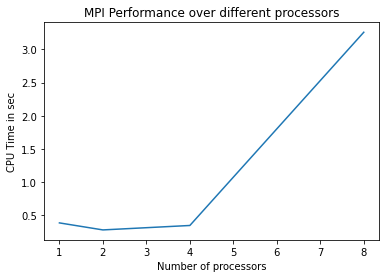

In [49]:
nb_proc = [1, 2, 4, 8]
cpu_time = [0.3884519260000161, 0.28275339600031657, 0.34954501299989715, 3.2585116810000727]
plt.figure(figsize=(6, 4))
plt.plot(nb_proc, cpu_time)
plt.xlabel("Number of processors")
plt.ylabel("CPU Time in sec")
plt.title("MPI Performance over different processors")
plt.show()

**We observe that the minmimal CPU time is reached by using 2 processors.**

## 5. Solving the equation using OpenMP directives

In [50]:
import numpy as np
from pyccel.epyccel import epyccel
from pyccel.stdlib.internal.openmp import omp_in_parallel,omp_get_thread_num, omp_get_num_threads

def advection_pure_pyccel(b : 'float[:,:]', rho : float, dt : float, u : 'float[:,:]', v : 'float[:,:]', dx : float, dy : float):
    #$omp parallel
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    #$omp end parallel
    return 0
advection_pure_pyccel = epyccel(advection_pure_pyccel, language = 'c',accelerators=['openmp'])


def poisson_pure_pyccel(p : 'float[:,:]', dx : float, dy : float, b : 'float[:,:]',nit:int):
    import numpy as np
    pn = np.empty_like(p)
    pn[:,:] = p[:,:]
    #$omp parallel
    #$omp for
    for q in range(nit):
        pn[:,:] = p[:,:]
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])
    
        p[:, -1] = p[:, -2] 
        p[0, :] = p[1, :]
        p[:, 0] = p[:, 1]  
        p[-1, :] = 0 
    #$omp end parallel    
    return 0

poisson_pure_pyccel = epyccel(poisson_pure_pyccel,language = 'c',accelerators=['openmp'])


def navier_stokes_pyccel(nit:int,nx : int, ny : int,nt : int, u : 'float[:,:]', v : 'float[:,:]', dt : float, dx : float, dy : float, p : 'float[:,:]', rho : float, nu : int):
    import numpy as np
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    tolerance = 1e-10
    # Let's build the progress bar
    from tqdm.notebook import tqdm
    pbar = tqdm(total=nt)
    pbar.set_description("it/nt")
    
    
    diff_p = 1.
    t1 = time.time()
    it = 0
    #$omp parallel
    #$omp for
    for n in range(nt):
        it = n + 1
        
        if diff_p < tolerance:
            break
            
        un[:,:] = u[:,:]
        vn[:,:] = v[:,:]
        
        
        pn = p[:,:]
        
        advection_pure_pyccel(b, rho, dt, u, v, dx, dy)
        poisson_pure_pyccel(p, dx, dy, b,nit)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
        #$omp end parallel
        u[0, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
        u[-1, :] = 1    # (velocity on cavity lid equal to 1)
        v[0, :] = 0
        v[-1, :]=0
        v[:, 0] = 0
        v[:, -1] = 0
        
        
        pbar.update(1)
    
    t2 = time.time()
    print(f'\nConvergence in {t2 - t1} secs')
    del pbar

    return u, v, p

  0%|          | 0/1000 [00:00<?, ?it/s]


Convergence in 0.5606789588928223 secs


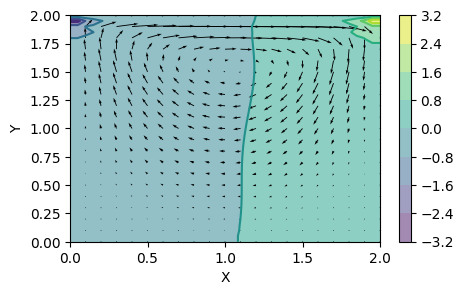

In [51]:
nx = 41
ny = 41
nt = 1000
nit = 50
c = 1.0
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1.0
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

u, v, p = navier_stokes_pyccel(nit,nx,ny,nt, u, v, dt, dx, dy, p, rho, nu)

fig = plt.figure(figsize=(5, 3), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<center><h2>General Conclusion</h2></center>

In this project we implement different methods to solve Navier Stockes Equation. Among those methods, we have Finite Difference and Jacobi's iterative. We compared serial and parallel methods like MPI and OpenMP. As results, we got to know that **parallel methods outperformed serial (simple iterative) methods** in terms of number of iterations and CPU time. At the end, we found that **MPI outperformed OpenMP espacially with 2 processors** in our local machine (4GB RAM, Acer Intel CORE i5 7th Gen).

<center><h4>Thank you for reading this !</h4></center>